In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


In [2]:
housing = fetch_california_housing()
housingDataFrame = pd.DataFrame(housing.data, columns = housing.feature_names)
housingDataFrame["MedHouseVal"] = housing.target
X = housingDataFrame.drop('MedHouseVal', axis = 1)
Y = housingDataFrame['MedHouseVal']
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [3]:
arbol = DecisionTreeRegressor(max_depth = 5)
arbol.fit(X_train, Y_train)
pred_arbol = arbol.predict(X_test)
# Evaluación del modelo
mse_arbol = mean_squared_error(y_pred=pred_arbol, y_true = Y_test)
print("MSE del árbol de decisión: {}".format(mse_arbol))
predicciones_arbol = pd.DataFrame({"y_test": Y_test, "y_pred": pred_arbol})

MSE del árbol de decisión: 0.5261535024871209


In [4]:
predicciones_arbol

,y_test,y_pred
14772,0.936,1.655930
10105,1.536,1.682324
20094,1.325,0.934761
19261,1.479,1.257178
14139,1.207,1.257178
...,...,...
1223,0.926,0.934761
17791,2.131,2.169044
14210,1.422,2.169044
7438,1.648,1.682324


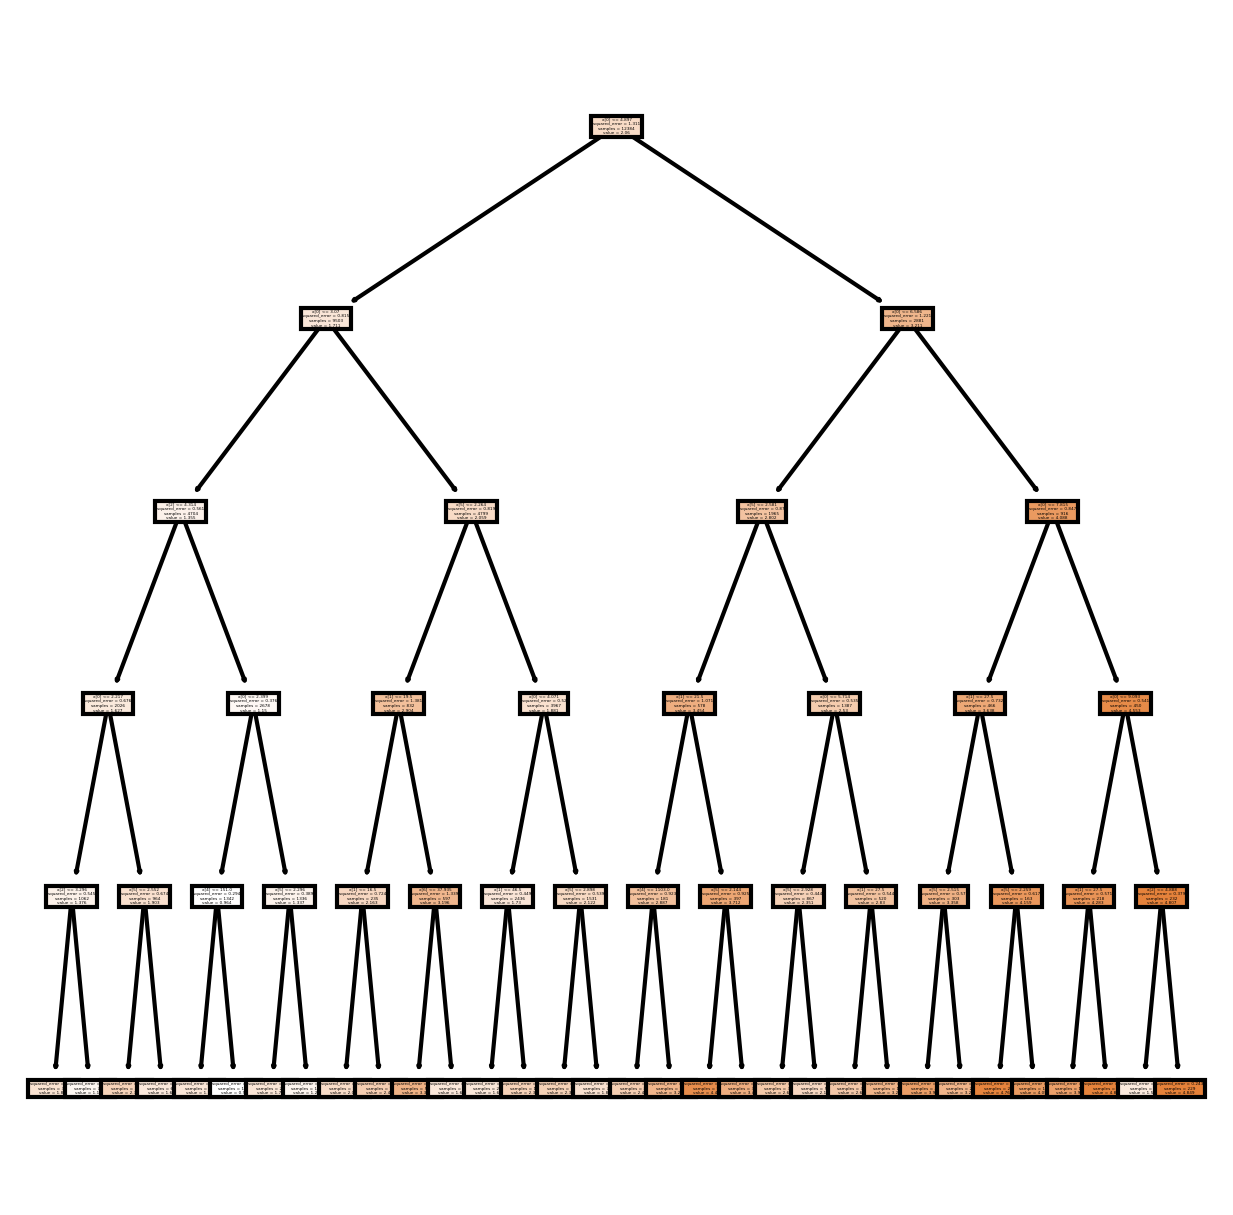

In [5]:
plt.figure(figsize = (5,5), dpi = 300)
plot_tree(arbol,filled = True);
plt.show()

In [6]:
# bosque aleatorio
bosque = RandomForestRegressor(800)
bosque.fit(X_train, Y_train)
pred_bosque = bosque.predict(X_test)
# Evaluación del modelo
mse_bosque = mean_squared_error(y_pred=pred_arbol, y_true = Y_test)
print("MSE del bosque aleatorio: {}".format(mse_bosque))
predicciones_arbol["pred_bosque"] = pred_bosque
predicciones_arbol

MSE del bosque aleatorio: 0.5261535024871209


,y_test,y_pred,pred_bosque
14772,0.936,1.655930,1.277507
10105,1.536,1.682324,1.867104
20094,1.325,0.934761,1.650707
19261,1.479,1.257178,1.612760
14139,1.207,1.257178,1.305656
...,...,...,...
1223,0.926,0.934761,1.054967
17791,2.131,2.169044,2.209603
14210,1.422,2.169044,1.475648
7438,1.648,1.682324,1.558334
